## Inicializando a automatização 

In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time
from bs4 import BeautifulSoup
import nltk
nltk.download('stopwords')
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from wordcloud import WordCloud


url = 'https://g1.globo.com/busca/?q=ucrania'
options = Options() 
options.headless = True #impossibilita a abertura do browser
driver = webdriver.Chrome(r'C:\Users\Acer\OneDrive\Documentos\chrome_webdriver\chromedriver', options=options)
driver.get(url)

driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Encontrando e capturando as informações desejadas

In [3]:
element = driver.find_element_by_id("content")
html = element.get_attribute('outerHTML')
print(element)
html = element.get_attribute('outerHTML')
driver.quit() #encerra a captura de dados

soup = BeautifulSoup(html, 'lxml') #comanda ao bs4 que o conteúdo obtido seja interpretado como HTML.

texto = [] #aqui criamos uma lista vazia e depois adicionamos as palavras que queremos para o wordcloud

for bloco in soup.find_all(class_='widget--info__text-container'): #captação de todos os títulos e subtitulos dentro do element
    for href in bloco.find_all('a'):
        title = href.find(class_="widget--info__title product-color")
        if(title):
            print('titulo',title.text[7:-2])
            texto.append(title.text[7:-2])
        subtitle = href.find(class_="widget--info__description")
        if(subtitle):
            texto.append(subtitle.text)
texto = ' '.join(texto)
#print(texto)

<selenium.webdriver.remote.webelement.WebElement (session="b441ca83eb47617165e77b8527cf45bc", element="24ec0d4d-476d-40b7-a477-74e5af0c3686")>
titulo   O que você precisa saber sobre a guerra na Ucrânia
    
titulo   Quem é Silvana Pilipenko, brasileira que está desaparecida na Ucrânia
    
titulo   Guerra na Ucrânia: pianista toca ao deixar casa bombardeada
    
titulo   O que se sabe sobre a brasileira desaparecida na Ucrânia
    
titulo   Teatro que abrigava mil desalojados é bombardeado na Ucrânia
    
titulo   Há rascunho de acordo entre Rússia e Ucrânia, diz imprensa britânica
    
titulo   Teatro que abrigava mil desalojados é bombardeado na Ucrânia
    
titulo   Guerra na Ucrânia: veja os principais acontecimentos do 22º dia de conflito
    
titulo   Veja o que foi anunciado de ajuda financeira à Ucrânia até agora
    
titulo   Vídeo mostra bombardeio em base militar da Ucrânia
    
titulo   Ucrânia e Rússia sinalizam avanços nas negociações
    
titulo   Corte Internacional de

# # Criação do wordcloud

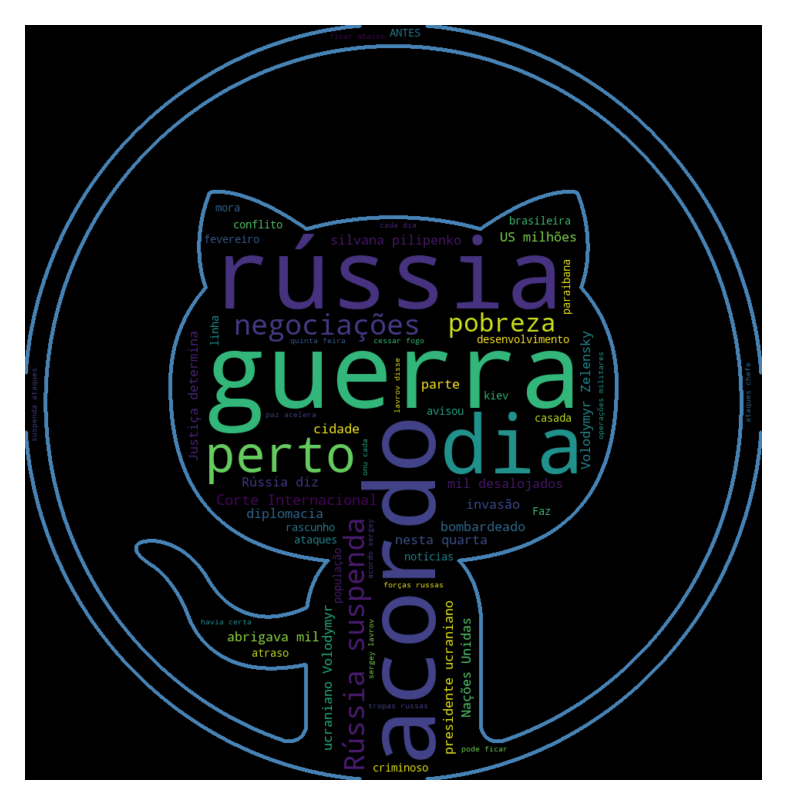

In [4]:
stopwords = nltk.corpus.stopwords.words('portuguese') + ['ucrânia']
comment_words = ''

words = texto.split()

for i in range(len(words)):
    words[i] = words[i].lower()
    comment_words += " ".join(words)+" "
    
    
mask = np.array(Image.open(r'C:\Users\Acer\OneDrive\Documentos\ucrania_scraping-main\github_mask.png'))

wordcloud = WordCloud(mask = mask, margin = 10,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10, contour_width=5, contour_color='steelblue').generate(comment_words)

default_colors = wordcloud.to_array()
plt.figure(dpi=250)
plt.imshow(default_colors, interpolation="bilinear")
wordcloud.to_file("wordcloud.png")
plt.axis("off")
#plt.savefig(r'C:\Users\Acer\OneDrive\Documentos\ucrania_scraping-main\mascara-final.png', bbox_inches='tight')
plt.show()

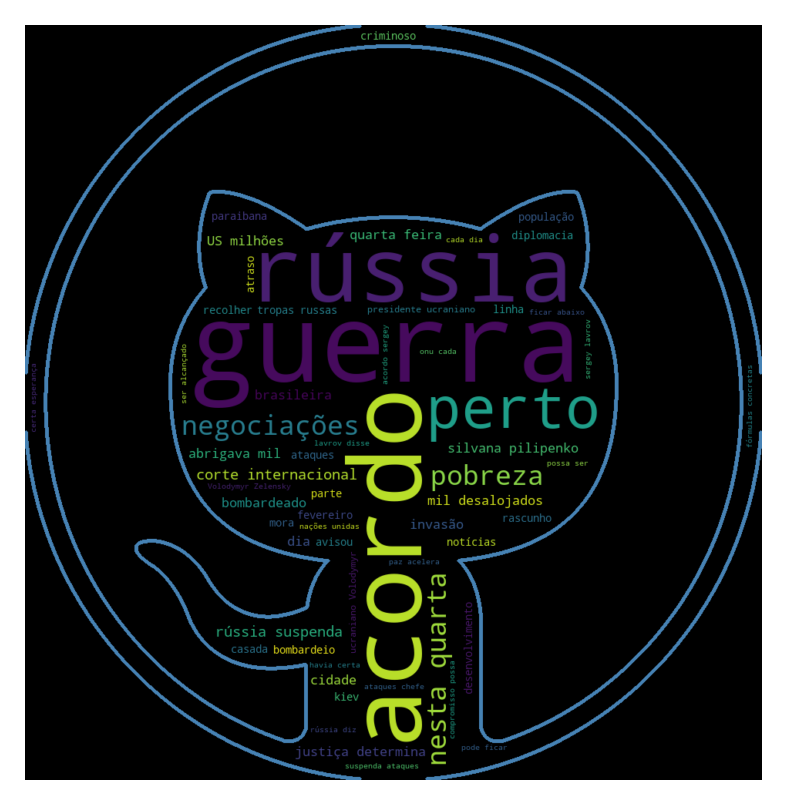